# Holiday_Package_Prediction

About this file

Suggest Edits
"Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

We need to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv(r"C:\Users\nico_\Desktop\Data science bootcamp\Random Forest\Travel.csv")

In [10]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# Data Cleaning

In [13]:
df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

## Check all the categories

In [16]:
df.dtypes

CustomerID                    int64
ProdTaken                     int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
dtype: object

In [18]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [20]:
df['Occupation'].value_counts()

Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64

In [22]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [24]:
df['Gender']=df['Gender'].replace('Fe Male','Female')

In [26]:
df['ProductPitched'].value_counts()

ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64

In [28]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [30]:
df['MaritalStatus']=df['MaritalStatus'].replace('Single','Unmarried')

In [32]:
df['Designation'].value_counts()

Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64

In [34]:
# Check missing value
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [36]:
df.dtypes

CustomerID                    int64
ProdTaken                     int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
dtype: object

In [38]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [40]:
# Imputing the nan values

# Numerical values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['NumberOfTrips'].fillna(df['NumberOfTrips'].median(), inplace=True)
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)

# Categorial values
df['TypeofContact'].fillna(df['TypeofContact'].mode()[0], inplace=True)
df['DurationOfPitch'].fillna(df['DurationOfPitch'].mode()[0], inplace=True)
df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mode()[0], inplace=True)
df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].mode()[0], inplace=True)
df['NumberOfChildrenVisiting'].fillna(df['NumberOfChildrenVisiting'].mode()[0], inplace=True)

In [42]:
df.isna().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [44]:
df.drop('CustomerID', inplace=True, axis=1)

# Feature engineering

In [47]:
# New column
df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting' ]
df.drop(['NumberOfPersonVisiting','NumberOfChildrenVisiting' ], axis=1, inplace=True)

In [49]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print(num_features)

['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting']


In [51]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print(cat_features)

['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


In [53]:
df.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfFollowups', 'ProductPitched',
       'PreferredPropertyStar', 'MaritalStatus', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'Designation', 'MonthlyIncome',
       'TotalVisiting'],
      dtype='object')

In [55]:
# Dependent and independent features
X=df.drop('ProdTaken', axis=1)
y=df['ProdTaken']

In [57]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [59]:
# Column Transformer
cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_transformer, cat_features),
        ('StandardScaler', numeric_transformer, num_features)
    ]
)

In [61]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

In [63]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [65]:
X_train

array([[ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.38224537, -0.77415132],
       [ 1.        ,  0.        ,  1.        , ...,  0.78296635,
        -0.4597992 ,  0.64361526],
       [ 1.        ,  1.        ,  0.        , ...,  0.78296635,
        -0.24519557, -0.06526803],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.36057591,  0.64361526],
       [ 1.        ,  0.        ,  0.        , ...,  0.78296635,
        -0.25279888,  0.64361526],
       [ 0.        ,  0.        ,  1.        , ..., -1.2771941 ,
        -1.08251091, -1.48303461]])

In [67]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-0.979376,1.284279,-0.725271,-0.127737,-0.632399,0.679690,0.782966,-0.382245,-0.774151
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.721400,0.707355,0.282777,-0.725271,1.511598,-0.632399,0.679690,0.782966,-0.459799,0.643615
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-0.979376,0.282777,1.771041,0.418708,-0.632399,0.679690,0.782966,-0.245196,-0.065268
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-0.721400,-0.979376,1.284279,-0.725271,-0.127737,-0.632399,1.408395,-1.277194,0.213475,-0.065268
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,2.394086,-1.720227,-0.725271,1.511598,-0.632399,-0.049015,-1.277194,-0.024889,2.061382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.721400,-0.617934,1.284279,-0.725271,-0.674182,-0.632399,-1.506426,0.782966,-0.536973,0.643615
3906,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.455047,-0.858895,-0.718725,1.771041,-1.220627,-0.632399,1.408395,0.782966,1.529609,-0.065268
3907,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.455047,1.550720,0.282777,-0.725271,2.058043,-0.632399,-0.777720,0.782966,-0.360576,0.643615
3908,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.455047,1.791682,1.284279,-0.725271,-0.127737,-0.632399,-1.506426,0.782966,-0.252799,0.643615


# GradientBoostingClassifier/AdaBoost Classifier/Random Forest Classifier / Decision Tree Classifier / Logistic Regression

In [79]:
models={
    "Gradient Boost":GradientBoostingClassifier(),
    "Adaboost":AdaBoostClassifier(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Logistic Regression":LogisticRegression()
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_f1_score = f1_score(y_train,y_train_pred, average='weighted')
    model_train_roc_auc_score = roc_auc_score(y_train,y_train_pred)

    # Test set performance
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall = recall_score(y_test,y_test_pred)
    model_test_f1_score = f1_score(y_test,y_test_pred, average='weighted')
    model_test_roc_auc_score = roc_auc_score(y_test,y_test_pred)

    print("----------------------------------------")
    print(list(models.keys())[i])

    print("Model performance for training set")

    print("Accuracy :", model_train_accuracy)
    print("precison :", model_train_precision)
    print("recall :", model_train_recall)
    print("f1 score :", model_train_f1_score)
    print("roc auc score :", model_train_roc_auc_score)

    print("Model performance for test set")

    print("Accuracy :", model_test_accuracy)
    print("precison :", model_test_precision)
    print("recall :", model_test_recall)
    print("f1 score :", model_test_f1_score)
    print("roc auc score :", model_test_roc_auc_score)

----------------------------------------
Gradient Boost
Model performance for training set
Accuracy : 0.8933503836317136
precison : 0.8804878048780488
recall : 0.49519890260631
f1 score : 0.8809618098810198
roc auc score : 0.7398974707938812
Model performance for test set
Accuracy : 0.8609406952965235
precison : 0.7777777777777778
recall : 0.4031413612565445
f1 score : 0.8427225851203608
roc auc score : 0.6875935522928212
----------------------------------------
Adaboost
Model performance for training set
Accuracy : 0.8478260869565217
precison : 0.7815126050420168
recall : 0.2551440329218107
f1 score : 0.8146439190446891
roc auc score : 0.6193984861245332
Model performance for test set
Accuracy : 0.8353783231083844
precison : 0.75
recall : 0.2356020942408377
f1 score : 0.7987434557925993
roc auc score : 0.6082711868917022
----------------------------------------
Decision Tree
Model performance for training set
Accuracy : 1.0
precison : 1.0
recall : 1.0
f1 score : 1.0
roc auc score : 1.

In [81]:
# Hyperparamter training

rf_params = { "max_depth": [5,8, 10,15,None],
             "max_features": [5,7,8,"auto"],
             "min_samples_split": [2,8,15,20],
             "n_estimators": [100,20,500,1000]}

gradient_params= { "loss": ["log_loss", "exponential"],
                  "criterion": ["friedman_mse", "squared_error"],
                  "min_samples_split": [2,8,15,20],
                  "n_estimators": [100,200,500,1000],
                  "max_depth": [5,8,10,15,None]
                 }

In [83]:
randomcv_models= [("RF", RandomForestClassifier(), rf_params),
                 ("GB", GradientBoostingClassifier(), gradient_params)]

In [85]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 10, 15, None],
   'max_features': [5, 7, 8, 'auto'],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 20, 500, 1000]}),
 ('GB',
  GradientBoostingClassifier(),
  {'loss': ['log_loss', 'exponential'],
   'criterion': ['friedman_mse', 'squared_error'],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000],
   'max_depth': [5, 8, 10, 15, None]})]

In [87]:
model_param = {}

for name, model, params in randomcv_models:
    random=RandomizedSearchCV(estimator=model,
                              param_distributions=params,
                              n_iter=100,
                              cv=3,
                              verbose=2,
                              n_jobs=-1)

    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"Best params for {model_name}")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best params for RF
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}
Best params for GB
{'n_estimators': 1000, 'min_samples_split': 15, 'max_depth': 15, 'loss': 'exponential', 'criterion': 'friedman_mse'}


In [89]:
models={
    "Random Forest":RandomForestClassifier(n_estimators= 1000, min_samples_split= 2, max_features= 8, max_depth= None),
    "GradientBoosting":GradientBoostingClassifier(n_estimators= 1000, min_samples_split= 15, max_depth= 15, loss= "exponential", criterion= "friedman_mse")
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_f1_score = f1_score(y_train,y_train_pred, average='weighted')
    model_train_roc_auc_score = roc_auc_score(y_train,y_train_pred)

    # Test set performance
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall = recall_score(y_test,y_test_pred)
    model_test_f1_score = f1_score(y_test,y_test_pred, average='weighted')
    model_test_roc_auc_score = roc_auc_score(y_test,y_test_pred)

    print("----------------------------------------")
    print(list(models.keys())[i])

    print("Model performance for training set")

    print("Accuracy :", model_train_accuracy)
    print("precison :", model_train_precision)
    print("recall :", model_train_recall)
    print("f1 score :", model_train_f1_score)
    print("roc auc score :", model_train_roc_auc_score)

    print("Model performance for test set")

    print("Accuracy :", model_test_accuracy)
    print("precison :", model_test_precision)
    print("recall :", model_test_recall)
    print("f1 score :", model_test_f1_score)
    print("roc auc score :", model_test_roc_auc_score)

----------------------------------------
Random Forest
Model performance for training set
Accuracy : 1.0
precison : 1.0
recall : 1.0
f1 score : 1.0
roc auc score : 1.0
Model performance for test set
Accuracy : 0.9366053169734151
precison : 0.9640287769784173
recall : 0.7015706806282722
f1 score : 0.9326242754898267
roc auc score : 0.8476087202378972
----------------------------------------
GradientBoosting
Model performance for training set
Accuracy : 1.0
precison : 1.0
recall : 1.0
f1 score : 1.0
roc auc score : 1.0
Model performance for test set
Accuracy : 0.9570552147239264
precison : 0.9685534591194969
recall : 0.806282722513089
f1 score : 0.9555198679797386
roc auc score : 0.8999647411803056


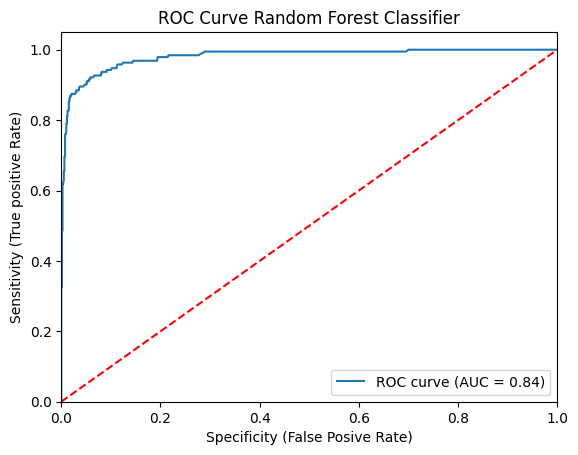

In [91]:
# Plot ROC AUC Curve
plt.figure()
auc_models = [
    {
        'label': 'Random Forest Classifier',
        'model': RandomForestClassifier(n_estimators= 1000, min_samples_split= 2, max_features= 8, max_depth= None),
        'auc': 0.8476
    }]

for algo in auc_models:
    model = algo["model"]
    model.fit(X_train,y_train)

    fpr,tpr,thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

    y_test_pred=model.predict(X_test)

    model_test_roc_auc_score = roc_auc_score(y_test,y_test_pred)
    
    plt.plot(fpr,tpr, label=f"ROC curve (AUC = {model_test_roc_auc_score:.2f})")

plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Specificity (False Posive Rate)')
plt.ylabel('Sensitivity (True positive Rate)')
plt.legend(loc="lower right")
plt.title("ROC Curve Random Forest Classifier")
plt.show()
    

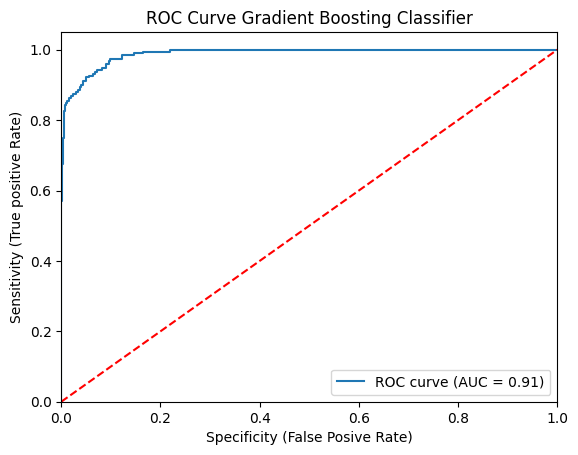

In [93]:
# Plot ROC AUC Curve
plt.figure()
auc_models = [
    {
        'label': "Gradient Boosting Classifier",
        'model': GradientBoostingClassifier(n_estimators= 1000, min_samples_split= 15, max_depth= 15, loss= "exponential", criterion= "friedman_mse"),
        'auc': 0.8999
    }]

for algo in auc_models:
    model = algo["model"]
    model.fit(X_train,y_train)

    fpr,tpr,thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

    y_test_pred=model.predict(X_test)

    model_test_roc_auc_score = roc_auc_score(y_test,y_test_pred)

    plt.plot(fpr,tpr, label=f"ROC curve (AUC = {model_test_roc_auc_score:.2f})")

plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Specificity (False Posive Rate)')
plt.ylabel('Sensitivity (True positive Rate)')
plt.legend(loc="lower right")
plt.title("ROC Curve Gradient Boosting Classifier")
plt.show()